In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df_sn = pd.read_csv("sn_apply.csv")
df_sn.head()

,year,num_total,num_M,num_F,cat_go3,cat_grad,cat_ged,num_test,score_avg,score_avg_M,score_avg_F,score_avg_go3,score_avg_grad,score_t50_avg,score_t50_avg_M,score_t50_avg_F,score_t50_avg_go3,score_t50_avg_grad
0,1994,742668,437465,305203,521806,213459,7403,716326,49.2,49.7,48.5,49.0,49.6,61.7,62.6,60.2,NaN,NaN
1,1994,750181,444612,305569,496617,243826,9738,726634,44.5,44.6,44.3,45.2,43.2,54.8,55.7,53.5,NaN,NaN
2,1995,781749,452360,329389,477960,261492,42297,757488,49.7,49.7,49.8,51.2,47.8,63.2,63.3,60.7,NaN,NaN
3,1996,840661,478707,361954,526833,300482,13346,809867,46.1,46.0,46.1,47.0,44.4,57.7,58.6,56.6,NaN,NaN
4,1997,824374,472527,351847,545023,268044,11307,795338,42.7,42.4,43.1,43.6,40.8,54.1,55.1,52.9,NaN,NaN


In [4]:
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                29 non-null     int64  
 1   num_total           29 non-null     int64  
 2   num_M               29 non-null     int64  
 3   num_F               29 non-null     int64  
 4   cat_go3             29 non-null     int64  
 5   cat_grad            29 non-null     int64  
 6   cat_ged             29 non-null     int64  
 7   num_test            29 non-null     int64  
 8   score_avg           9 non-null      float64
 9   score_avg_M         9 non-null      float64
 10  score_avg_F         9 non-null      float64
 11  score_avg_go3       9 non-null      float64
 12  score_avg_grad      9 non-null      float64
 13  score_t50_avg       9 non-null      float64
 14  score_t50_avg_M     9 non-null      float64
 15  score_t50_avg_F     9 non-null      float64
 16  score_t50_

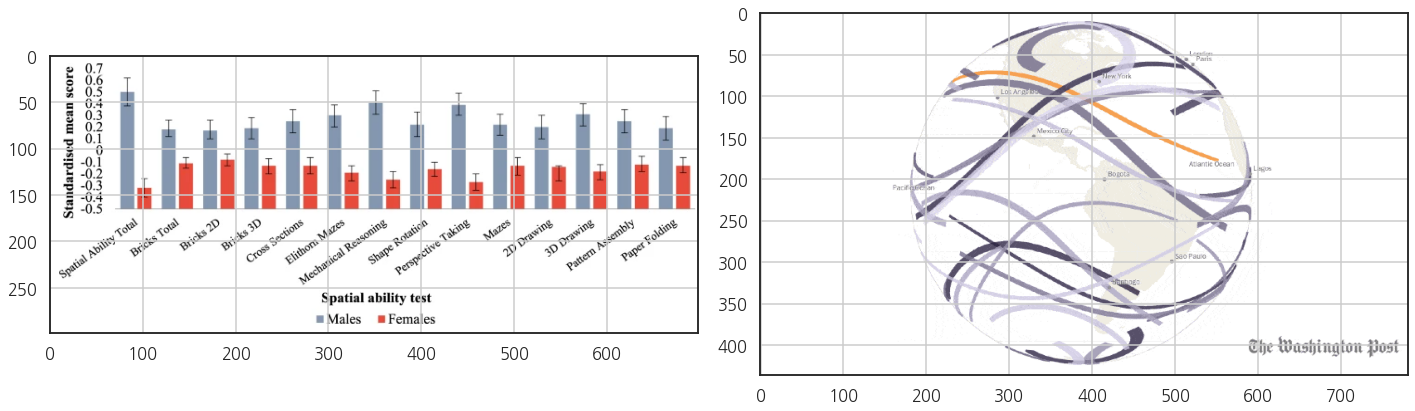

In [5]:
ex0 = plt.imread("./48_sn_colorexample1.png")
ex1 = plt.imread("./48_sn_colorexample2.png")

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
for i, (ax, ex) in enumerate(zip(axs, [ex0, ex1])):
    ax.imshow(ex)
    ax.grid()

fig.tight_layout()
fig.savefig("48_sn_2.png")

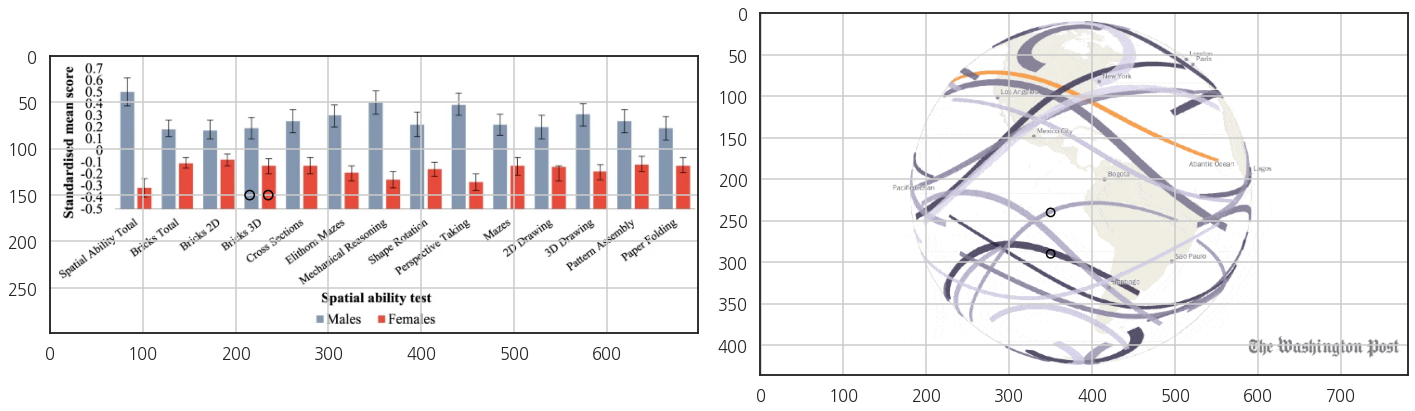

In [6]:
from matplotlib.patches import Circle

circle_F = Circle((235, 150), radius=5, edgecolor="k", facecolor="none")
circle_M = Circle((215, 150), radius=5, edgecolor="k", facecolor="none")
circle_total = Circle((350, 290), radius=5, edgecolor="k", facecolor="none")
circle_test = Circle((350, 240), radius=5, edgecolor="k", facecolor="none")

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
for i, (ax, ex) in enumerate(zip(axs, [ex0, ex1])):
    ax.imshow(ex)
    ax.grid()
    
axs[0].add_patch(circle_F)
axs[0].add_patch(circle_M)
axs[1].add_patch(circle_total)
axs[1].add_patch(circle_test)

fig.tight_layout()
fig.savefig("48_sn_3.png")

In [7]:
color_M = ex0[150, 235]
color_M

array([0.9019608 , 0.29803923, 0.23137255, 1.        ], dtype=float32)

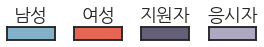

In [10]:
color_F = ex0[150, 235][:3] + np.array([0, 0.1, 0.1])
color_M = ex0[150, 215][:3] + np.array([0, 0.1, 0.1])
color_total = ex1[290, 350][:3]
color_test = ex1[240, 350][:3]

fig, axs = plt.subplots(ncols=4, figsize=(4, 1))
for ax, c, t in zip(axs, 
                    [color_M, color_F, color_total, color_test],
                    ["남성", "여성", "지원자", "응시자"]):
    ax.set_facecolor(c)
    ax.set_title(t)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()    
fig.savefig("48_sn_25.png")

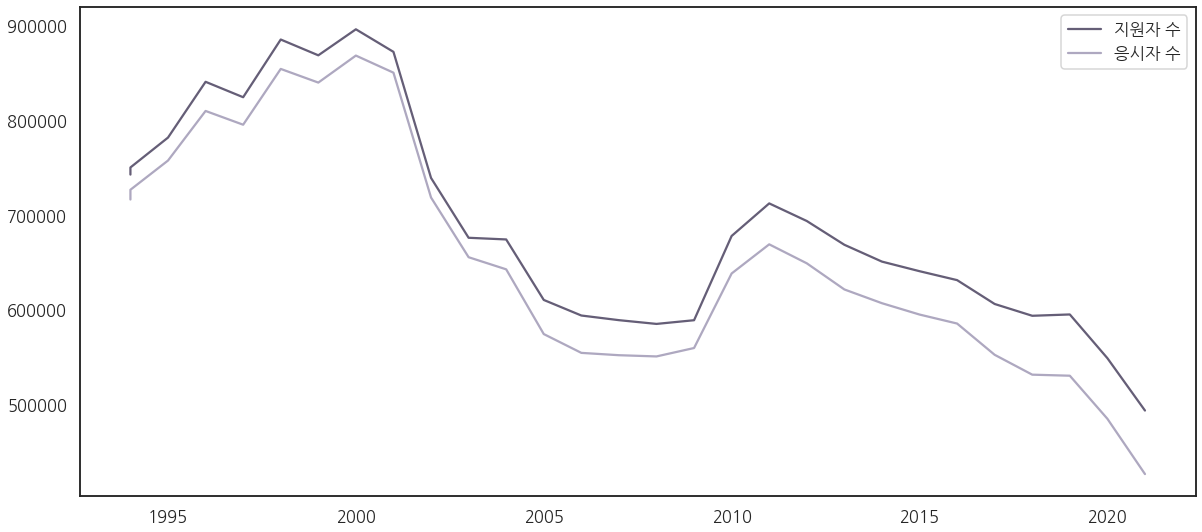

In [8]:
# step 1. 년도별 지원자 수

fig, ax = plt.subplots(figsize=(20, 9))

# 지원자 수 
ax.plot(df_sn["year"], df_sn["num_total"], color=color_total, label="지원자 수")

# 응시자 수
ax.plot(df_sn["year"], df_sn["num_test"], color=color_test, label="응시자 수")

# 범례 추가
ax.legend()

fig.savefig("48_sn_7.png")

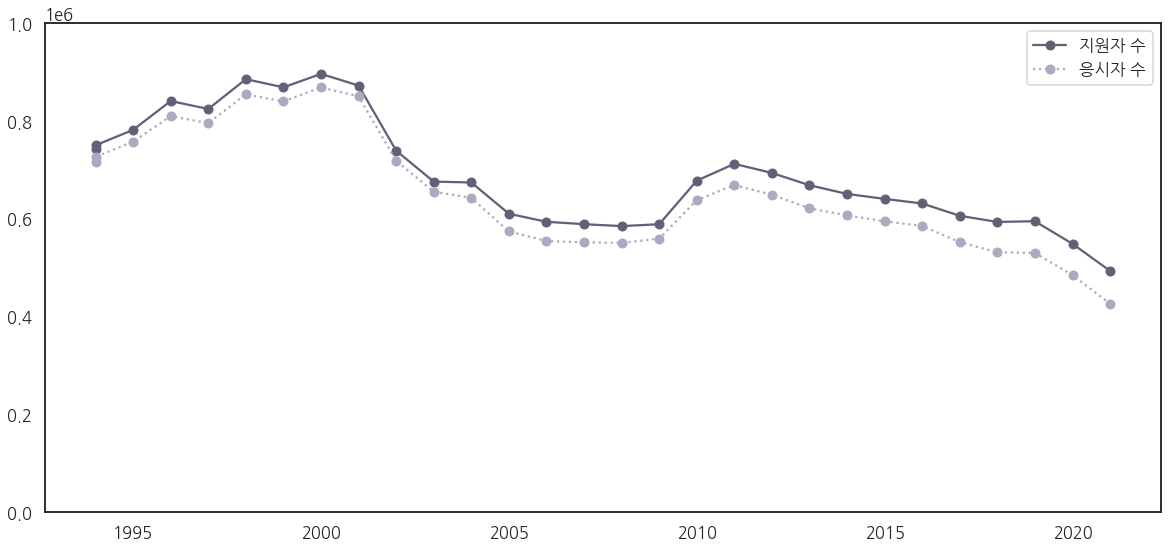

In [9]:
# step 2. plot 모양 바꾸기

fig, ax = plt.subplots(figsize=(20, 9))

# 마커 추가, 선 모양 변경
ax.plot(df_sn["year"], df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["year"], df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

# y축 범위 변경
ax.set_ylim(0, 1000000)

ax.legend()

fig.savefig("48_sn_8.png")

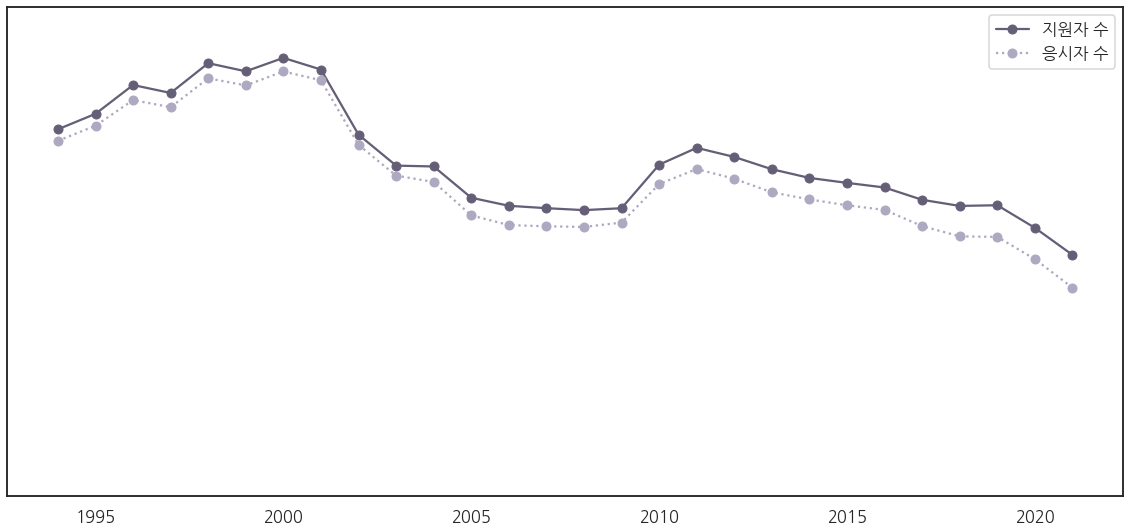

In [10]:
# step 3. 데이터 표현 바꾸기 (1)-실패

fig, ax = plt.subplots(figsize=(20, 9))

ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticklabel 표현 수정
yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([y for y in yticklabels]) # yticklabels 사용

ax.legend()

fig.savefig("48_sn_9.png")

In [11]:
print(yticklabels)

[Text(0, 0.0, ''), Text(0, 200000.0, ''), Text(0, 400000.0, ''), Text(0, 600000.0, ''), Text(0, 800000.0, ''), Text(0, 1000000.0, '')]


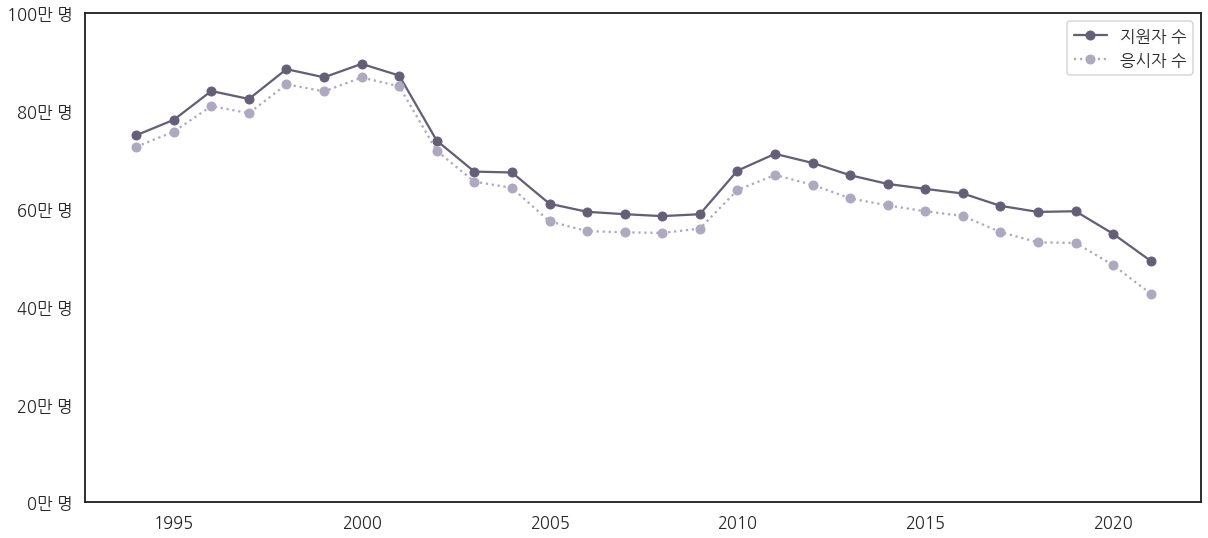

In [12]:
# step 3. 데이터 표현 바꾸기 (2)-성공

fig, ax = plt.subplots(figsize=(20, 9))

# 데이터 범위 수정
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticklabel 표현 수정
yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks]) # yticks 사용

ax.legend()

fig.savefig("48_sn_10.png")

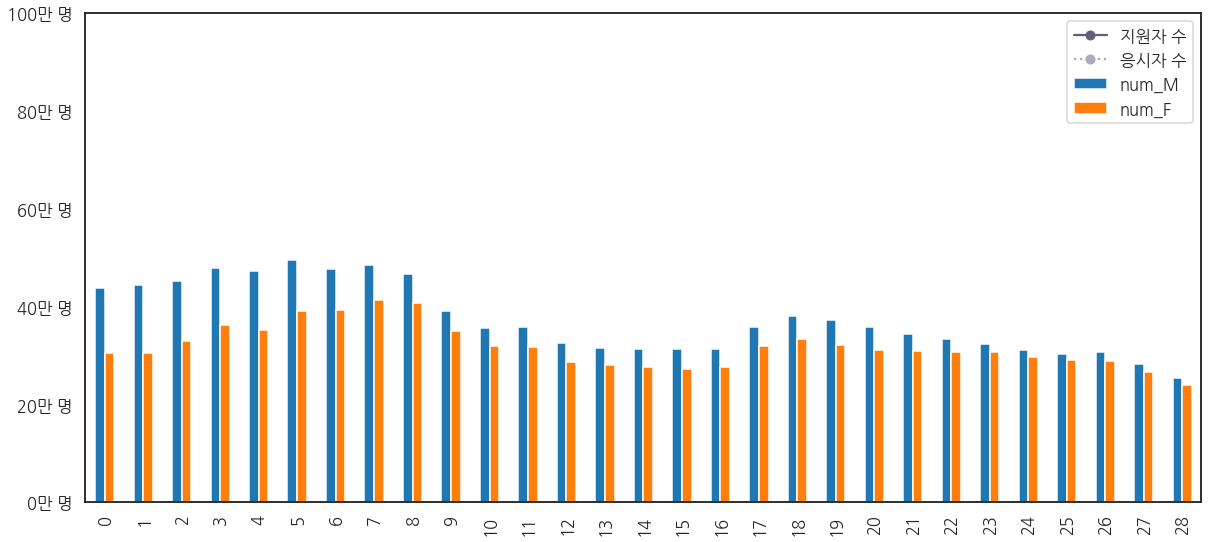

In [13]:
# step 4. 남녀 수험생 수 함께 그리기 (1)-실패

fig, ax = plt.subplots(figsize=(20, 9))

# pandas bar plot
ax = df_sn[["num_M", "num_F"]].plot.bar(ax=ax)

ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

fig.savefig("48_sn_11.png")

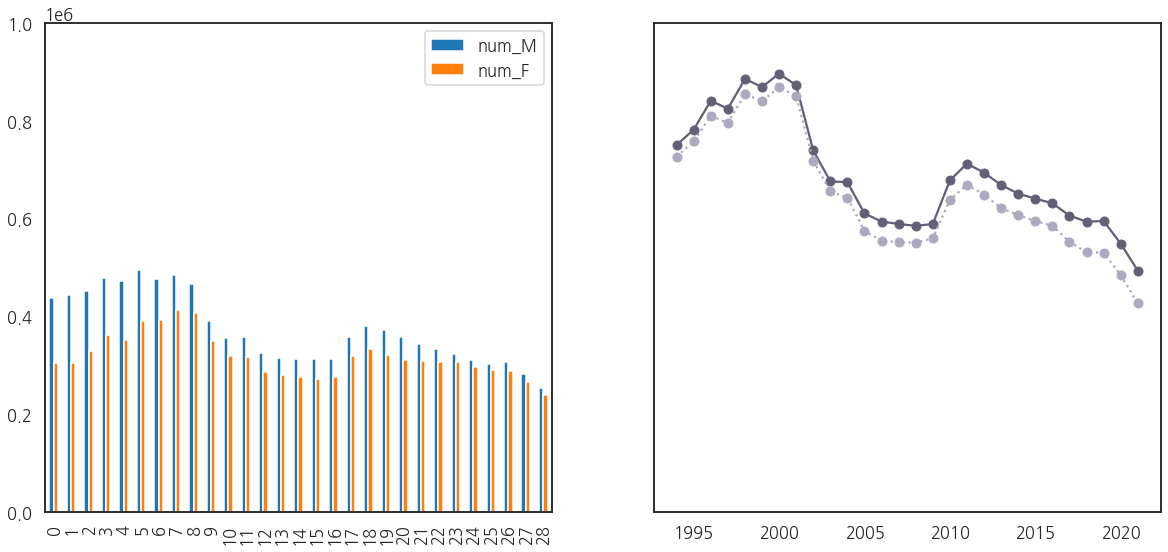

In [14]:
# step 4. 남녀 수험생 수 함께 그리기 (1)-실패

# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)

df_sn[["num_M", "num_F"]].plot.bar(ax=axs[0])

axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)

fig.savefig("48_sn_12.png")

In [15]:
xticks0 = axs[0].get_xticks()
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
xticks of axs[1] = [1990. 1995. 2000. 2005. 2010. 2015. 2020. 2025.]


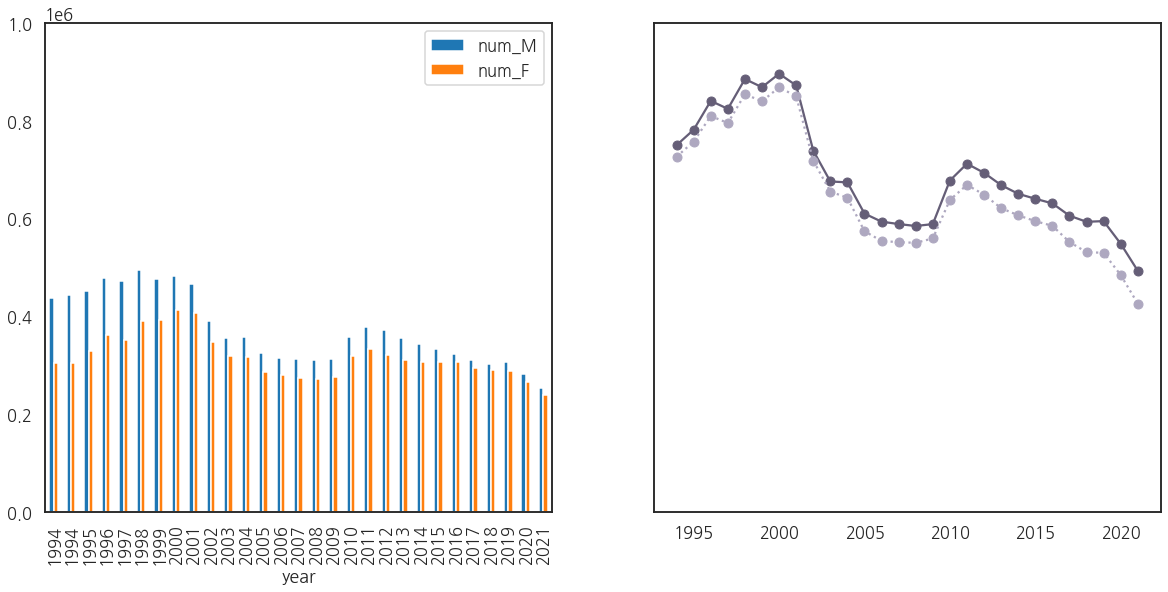

In [16]:
# step 4. 남녀 수험생 수 함께 그리기 (2)-또 실패

# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=axs[0])

axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)

fig.savefig("48_sn_13.png")

In [17]:
xticks0 = axs[0].get_xticks()
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
xticks of axs[1] = [1990. 1995. 2000. 2005. 2010. 2015. 2020. 2025.]


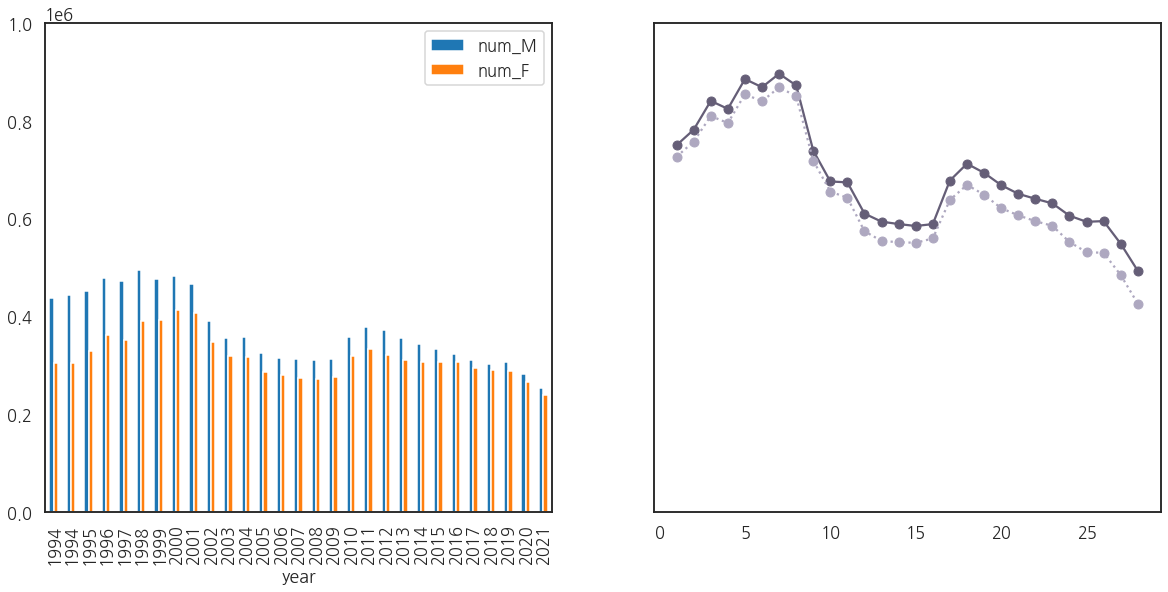

In [18]:
# step 4. 남녀 수험생 수 함께 그리기 (3)-성공?

# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=axs[0], zorder=0)

axs[1].plot(df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)

fig.savefig("48_sn_14.png")

In [19]:
xticks0 = axs[0].get_xticks()
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
xticks of axs[1] = [-5.  0.  5. 10. 15. 20. 25. 30.]


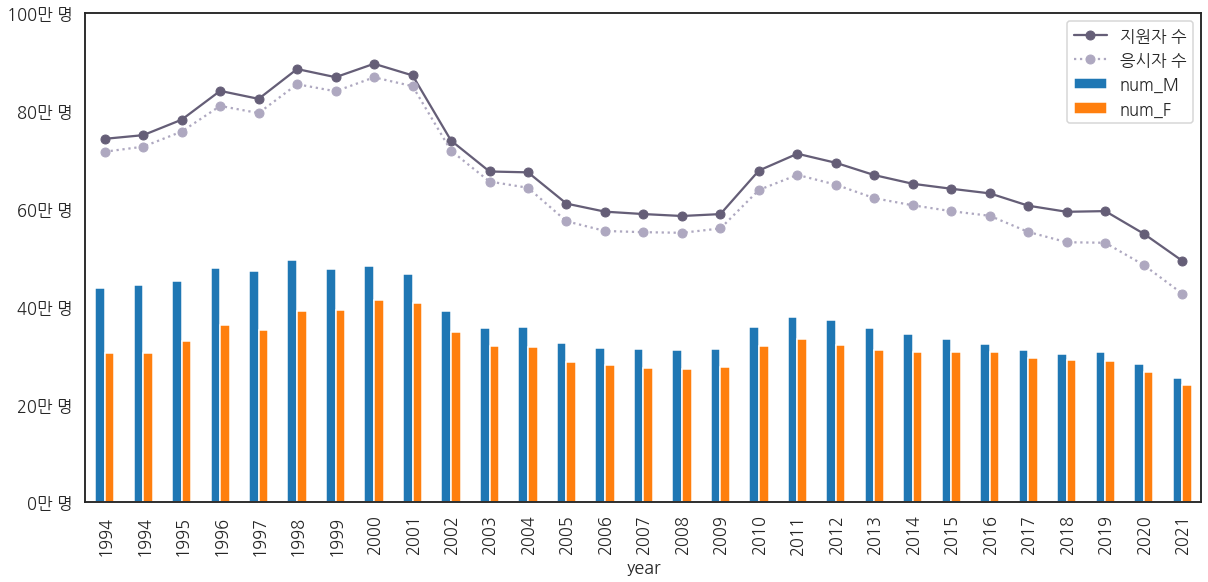

In [20]:
# step 4. 남녀 수험생 수 함께 그리기 (3)-성공!

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax)

# x 데이터 범위 수정
ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

fig.savefig("48_sn_15.png")

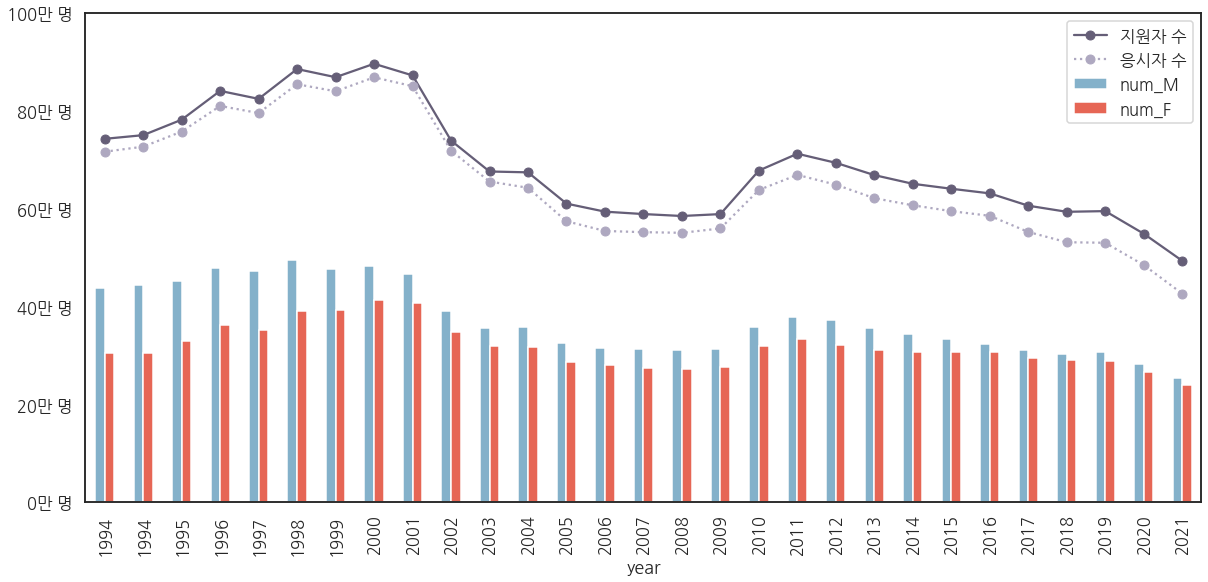

In [21]:
# step 5. pandas bar plot 색상 변경

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

fig.savefig("48_sn_16.png")

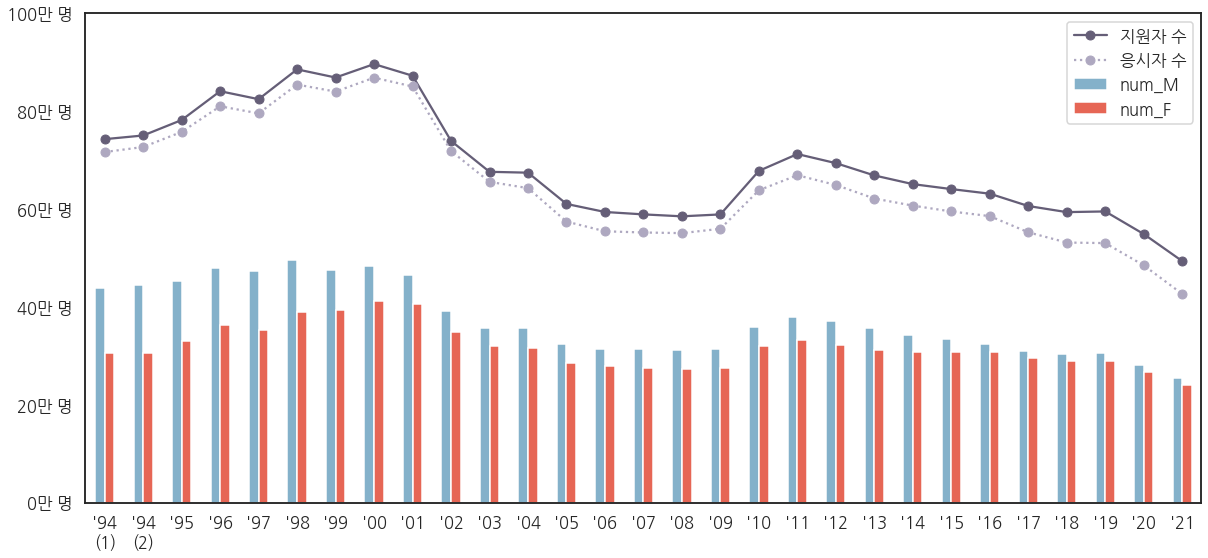

In [22]:
# step 6. x축 변경

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

# xticklabels 수정
xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

# xlabels 제거
ax.set_xlabel("")

ax.legend()

fig.savefig("48_sn_17.png")

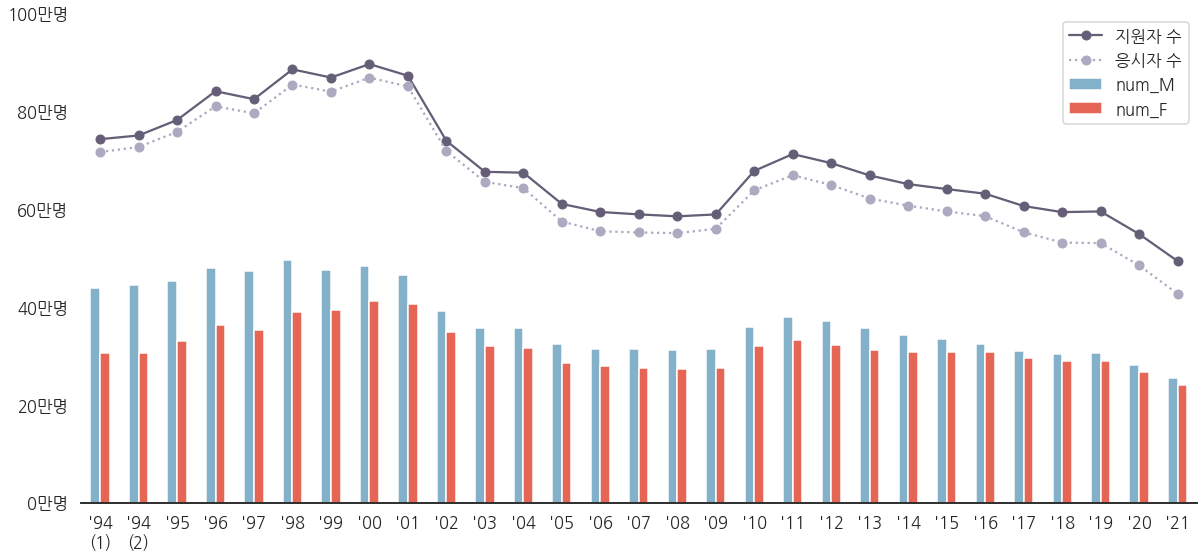

In [24]:
# step 7-0. spine

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend()

fig.savefig("49_sn_7.png")

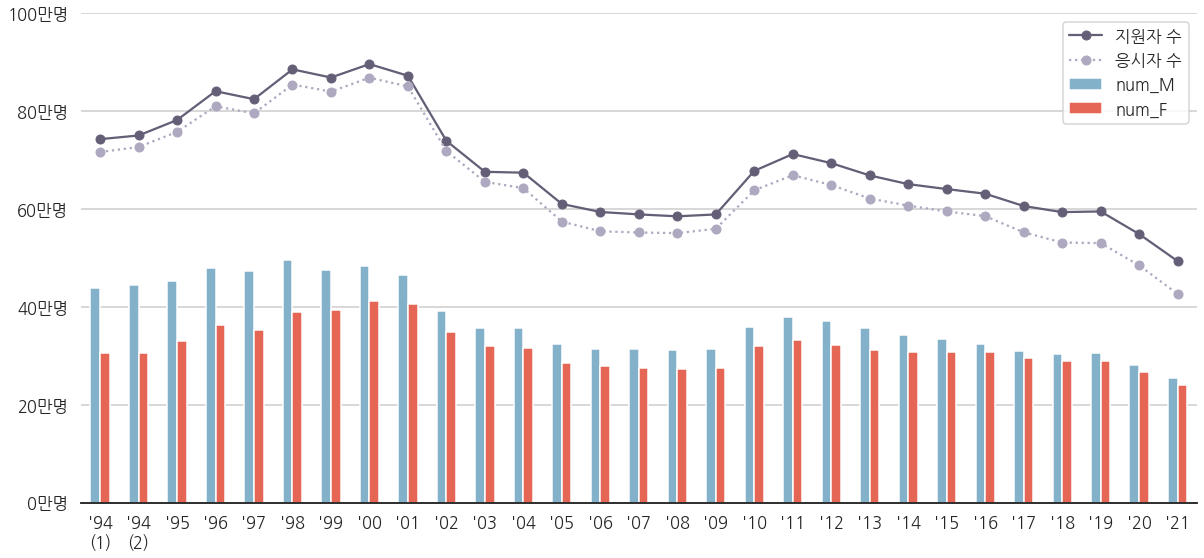

In [25]:
# step 7-1. grid (1) major grid

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend()

ax.grid(axis="y")

fig.savefig("49_sn_8.png")

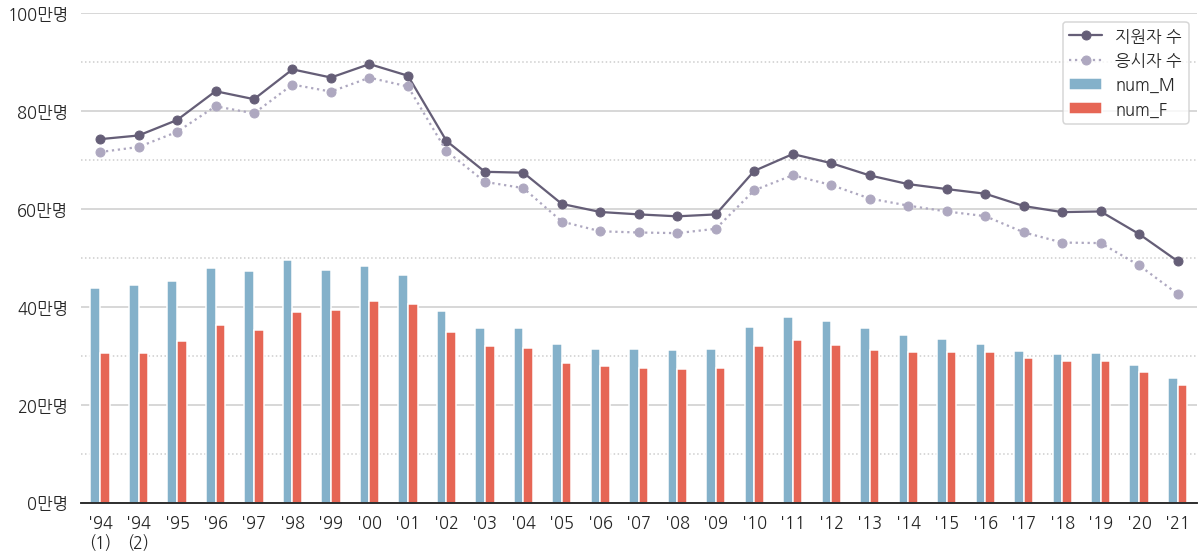

In [26]:
# step 7. spine, grid 설정

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


ax.legend()

fig.savefig("48_sn_18.png")

In [27]:
handles, labels = ax.get_legend_handles_labels()
print(f"# handles = {handles}")
print(f"# labels = {labels}")


# handles = [<matplotlib.lines.Line2D object at 0x7fee884e8d50>, <matplotlib.lines.Line2D object at 0x7fee89a38ad0>, <BarContainer object of 29 artists>, <BarContainer object of 29 artists>]
# labels = ['지원자 수', '응시자 수', 'num_M', 'num_F']


In [28]:
labels = labels[:2] + ["남성", "여성"]
print(f"# labels = {labels}")

# labels = ['지원자 수', '응시자 수', '남성', '여성']


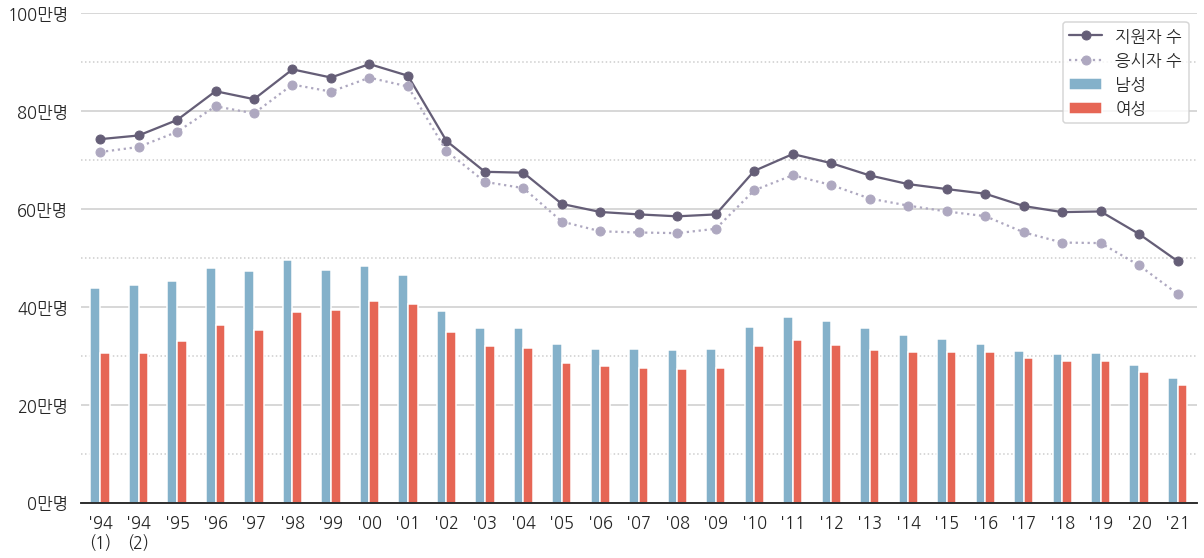

In [29]:
# step 8. 레이블 교체 - (0)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


ax.legend(handles=handles, labels=labels)

fig.savefig("49_sn_4.png")

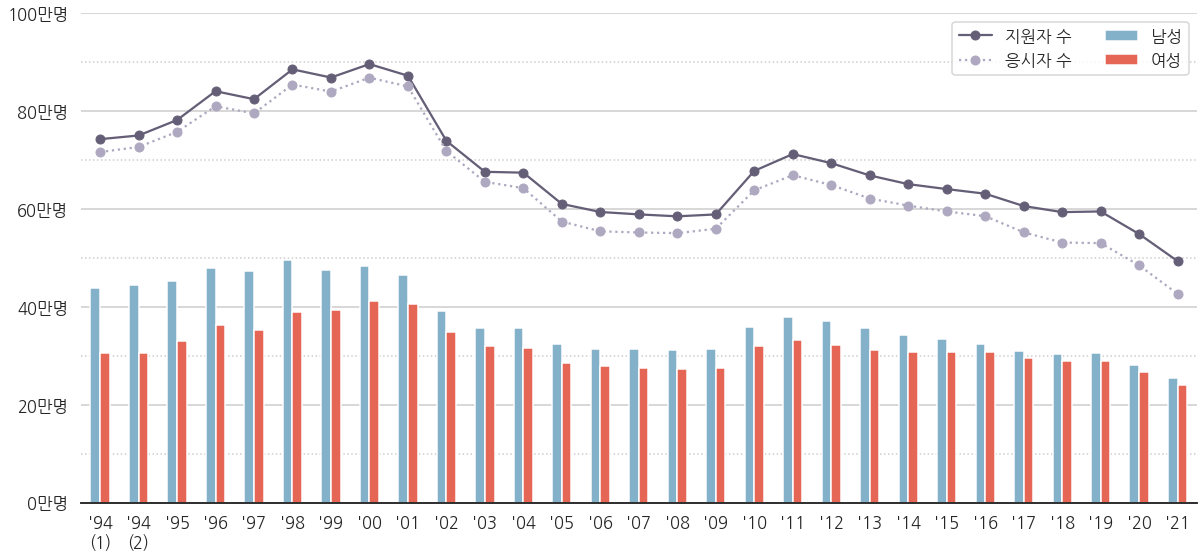

In [30]:
# step 8. legend 설정 -(1) 레이블 위치 수정

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend
handles, labels = ax.get_legend_handles_labels()
labels = labels[:2] + ["남성", "여성"]
ax.legend(handles=handles, labels=labels, loc="upper right", ncol=2)

fig.savefig("48_sn_19.png")

In [31]:
handles, labels = ax.get_legend_handles_labels()
labels = labels[:2] + ["남성", "여성"]

print(f"# handles = {np.array(handles).reshape(2,2).T.flatten()}")
print(f"# labels = {np.array(labels).reshape(2,2).T.flatten()}")


# handles = [<matplotlib.lines.Line2D object at 0x7fee89f9e250>
 <BarContainer object of 29 artists>
 <BarContainer object of 29 artists>]
# labels = ['지원자 수' '남성' '응시자 수' '여성']


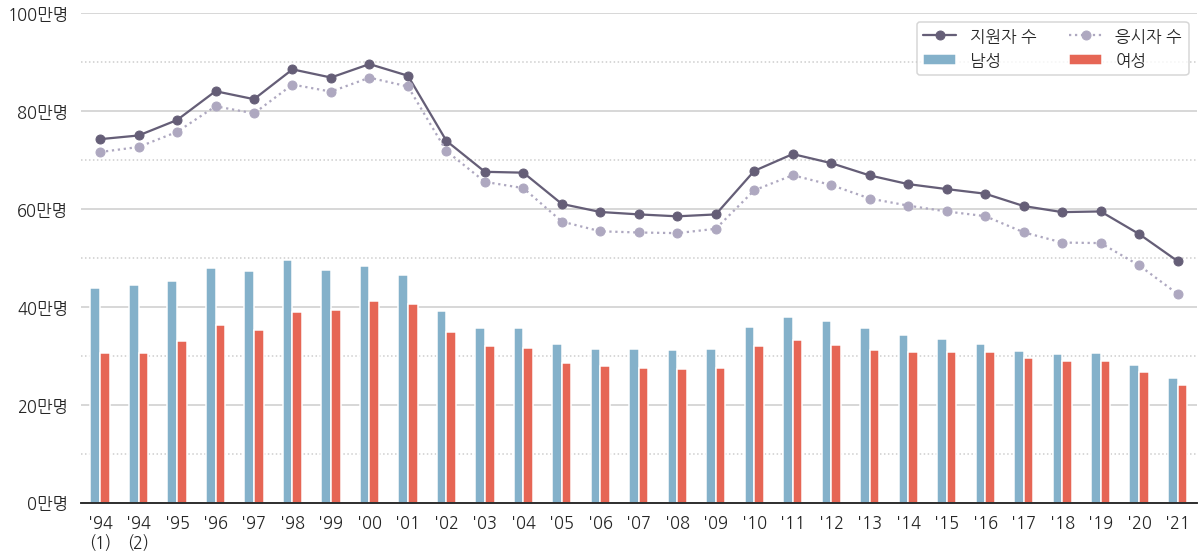

In [32]:
# step 8. legend 설정 -(2) 레이블 순서 교체

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend
handles, labels = ax.get_legend_handles_labels()
labels=labels[:2] + ["남성", "여성"]
handles = list(np.array(handles).reshape(2,2).T.flatten())
labels = list(np.array(labels).reshape(2,2).T.flatten())
ax.legend(handles=handles, labels=labels, loc="upper right", ncol=2)

fig.savefig("48_sn_20.png")

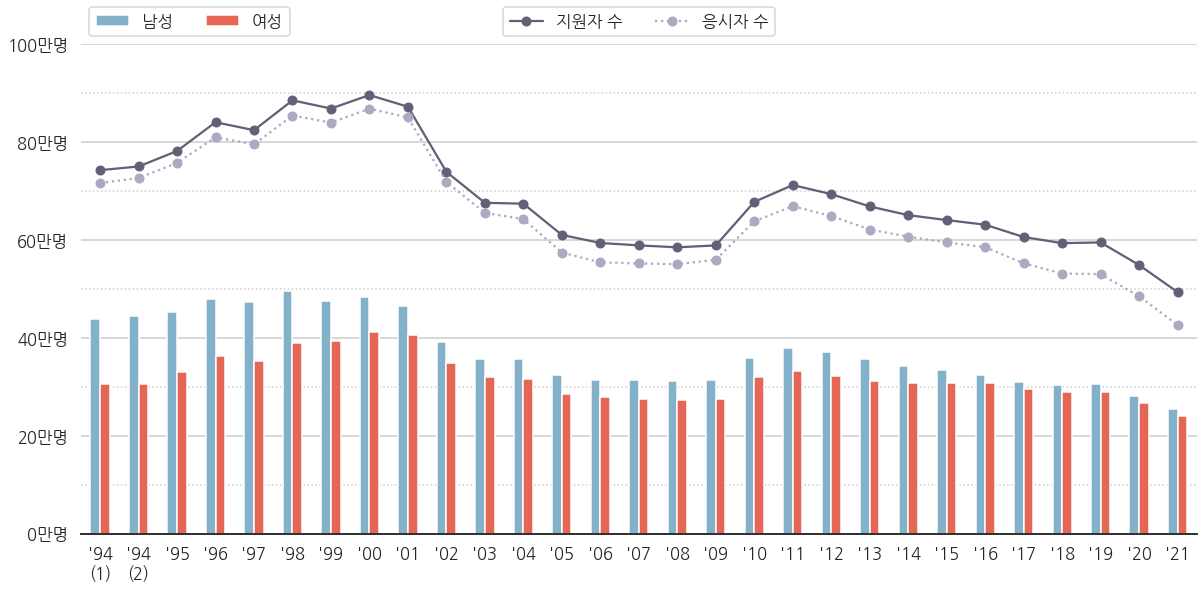

In [33]:
# step 8. legend 설정 -(3) 레이블 쪼개기

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))
ax.add_artist(legend0)

fig.savefig("48_sn_21.png")

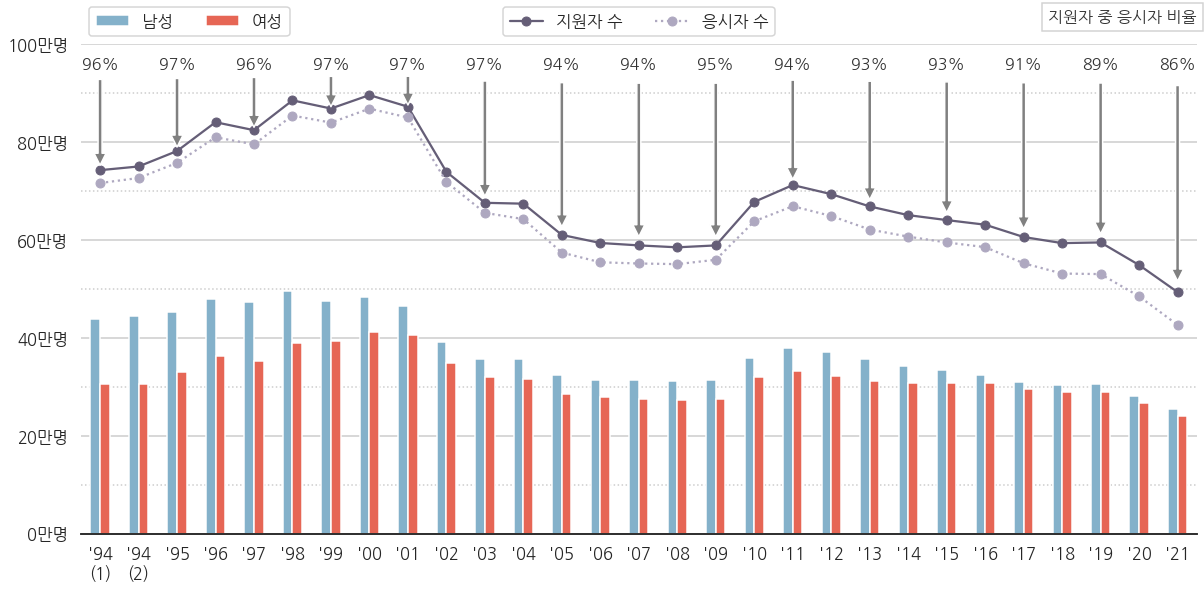

In [34]:
# step 9. 응시율 구하기

# 응시율 = 응시자 수 / 지원자 수
df_sn["num_test_rate"] = df_sn["num_test"]/df_sn["num_total"]*100

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

# 응시율
for i in range(0, df_sn.shape[0], 2):
    ax.annotate(f'{df_sn.loc[i, "num_test_rate"]:.0f}%',
                   xy=(i, df_sn.loc[i, "num_total"]), xytext=(i,950000), 
                   horizontalalignment='center',
                   arrowprops=dict(facecolor='gray', shrink=0.05),
                   fontsize=16, color="k", alpha=0.8)

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))

# legend (3) 응시율
ax.text(1, 1.04, "지원자 중 응시자 비율", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"0.2", "ha":"right", "va":"bottom"},
        bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})


ax.add_artist(legend0)

fig.savefig("48_sn_22.png")

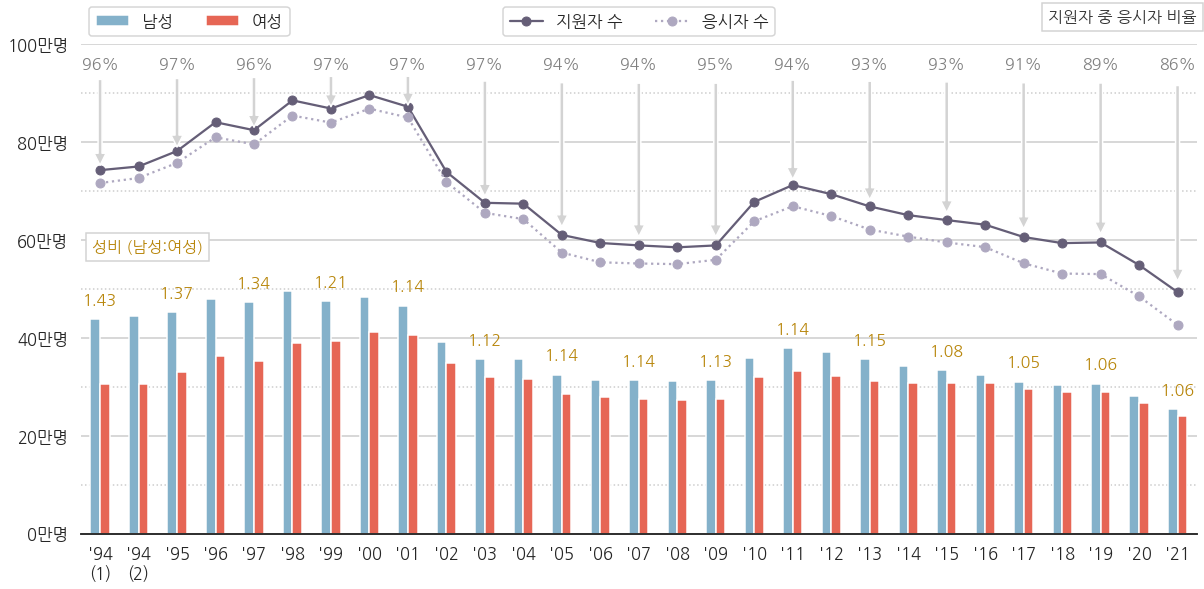

In [35]:
# step 10. 성비 구하기

# 성비 = 남성 수 / 여성 수
df_sn["num_M_rate"] = df_sn["num_M"]/df_sn["num_F"]

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")


for i in range(0, df_sn.shape[0], 2):
    # 응시율
    ax.annotate(f'{df_sn.loc[i, "num_test_rate"]:.0f}%',
                   xy=(i, df_sn.loc[i, "num_total"]), xytext=(i,950000), 
                   horizontalalignment='center',
                   arrowprops=dict(facecolor='lightgray', shrink=0.05),
                   fontsize=16, color="gray")
    # 성비       
    ax.annotate(f'{df_sn.loc[i, "num_M_rate"]:.2f}',
                   xy=(i, df_sn.loc[i, "num_M"]), xytext=(i, df_sn.loc[i, "num_M"]+30000), 
                   horizontalalignment='center',
                   fontsize=16, color="darkgoldenrod")

    
ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))

# legend (3) 응시율
ax.text(1, 1.04, "지원자 중 응시자 비율", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"0.2", "ha":"right", "va":"bottom"},
        bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})

# legend (4) 성비 (남성 : 여성)
ax.text(0.01, 0.57, "성비 (남성:여성)", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"darkgoldenrod", "ha":"left", "va":"bottom"},
        bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})



ax.add_artist(legend0)

fig.savefig("48_sn_23.png")

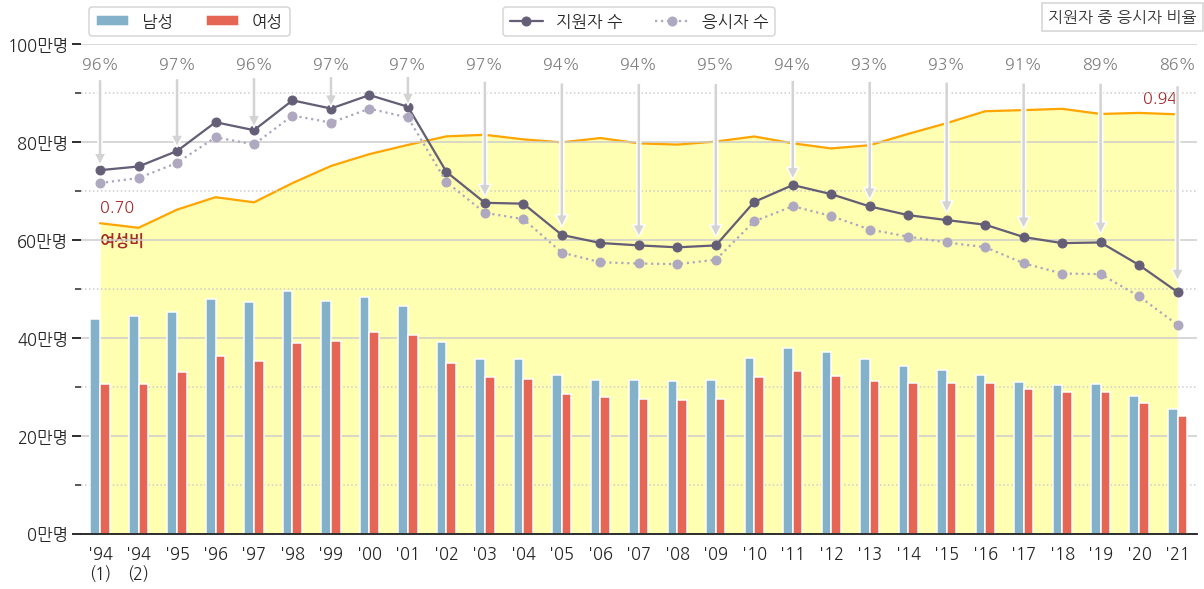

In [36]:
# step 11. 성비를 배경으로 넣기

# 여성비 = 여성 수 / 남성 수
df_sn["num_F_rate"] = df_sn["num_F"]/df_sn["num_M"]

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)
ax.set_facecolor("none")

# 여성비 
ax_F = ax.twinx()
ax_F.fill_between(df_sn.index, df_sn["num_F_rate"], 0, facecolor="yellow", alpha=0.3, zorder=0)
ax_F.plot(df_sn.index, df_sn["num_F_rate"], color="orange")
ax_F.set_ylim(0, 1.1)
ax_F.axis(False)

r_1994 = df_sn["num_F_rate"].iloc[0]
r_2021 = df_sn["num_F_rate"].iloc[-1]
for idx, r, ha in zip([0, df_sn.shape[0]-1], [r_1994, r_2021], ["left", "right"]):
    ax_F.text(idx, r+0.02, f'{r:.2f}', fontdict={"fontsize":16, "color":"brown", "ha":ha, "va":"bottom"})

ax_F.text(0, df_sn["num_F_rate"].iloc[0]-0.05, "여성비", 
          fontdict={"fontsize":16, "color":"brown", "ha":"left", "fontweight":"bold"})

# axes 순서
ax_F.set_zorder(0)
ax.set_zorder(1)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F}, zorder=1)

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수", zorder=1)
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수", zorder=1)


for i in range(0, df_sn.shape[0], 2):
    # 응시율
    ax.annotate(f'{df_sn.loc[i, "num_test_rate"]:.0f}%',
                   xy=(i, df_sn.loc[i, "num_total"]), xytext=(i,950000), 
                   horizontalalignment='center',
                   arrowprops=dict(facecolor='lightgray', shrink=0.05),
                   fontsize=16, color="gray")
    # 성비       
#     ax.annotate(f'{df_sn.loc[i, "num_M_rate"]:.2f}',
#                    xy=(i, df_sn.loc[i, "num_M"]), xytext=(i, df_sn.loc[i, "num_M"]+30000), 
#                    horizontalalignment='center',
#                    fontsize=16, color="darkgoldenrod")

    
ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))

# legend (3) 응시율
ax.text(1, 1.04, "지원자 중 응시자 비율", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"0.2", "ha":"right", "va":"bottom"},
        bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})

# legend (4) 성비 (남성 : 여성)
# ax.text(0.01, 0.57, "성비 (남성:여성)", transform=ax.transAxes,
#         fontdict={"fontsize":16, "color":"darkgoldenrod", "ha":"left", "va":"bottom"},
#         bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})



ax.add_artist(legend0)

fig.savefig("48_sn_24.png")

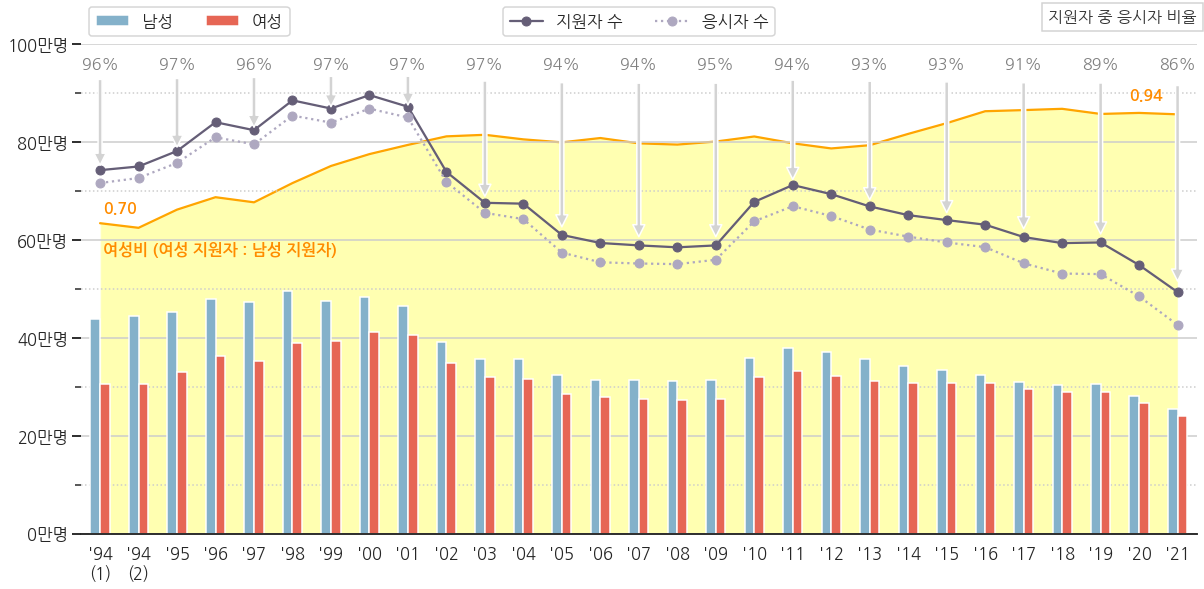

In [37]:
# step 12. 여성비 글자 앞으로 가져오기

# 여성비 = 여성 수 / 남성 수
df_sn["num_F_rate"] = df_sn["num_F"]/df_sn["num_M"]

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)
ax.set_facecolor("none")

# 여성비 
ax_F = ax.twinx()
ax_F.fill_between(df_sn.index, df_sn["num_F_rate"], 0, facecolor="yellow", alpha=0.3, zorder=0)
ax_F.plot(df_sn.index, df_sn["num_F_rate"], color="orange")
ax_F.set_ylim(0, 1.1)
ax_F.axis(False)

r_1994 = df_sn["num_F_rate"].iloc[0]
r_2021 = df_sn["num_F_rate"].iloc[-1]
for x, y, r, ha in zip([0.02, 0.97], [0.65, 0.88], [r_1994, r_2021], ["left", "right"]):
    ax.text(x, y, f'{r:.2f}', zorder=2, transform=ax.transAxes, 
            fontdict={"fontsize":16, "color":"darkorange", "ha":ha, "va":"bottom", "fontweight":"bold"})

ax.text(0.02, 0.57, "여성비 (여성 지원자 : 남성 지원자)", zorder=2, transform=ax.transAxes,
          fontdict={"fontsize":16, "color":"darkorange", "ha":"left", "fontweight":"bold"})

# axes 순서
ax_F.set_zorder(0)
ax.set_zorder(1)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F}, zorder=1)

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수", zorder=1)
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수", zorder=1)


for i in range(0, df_sn.shape[0], 2):
    # 응시율
    ax.annotate(f'{df_sn.loc[i, "num_test_rate"]:.0f}%',
                   xy=(i, df_sn.loc[i, "num_total"]), xytext=(i,950000), 
                   horizontalalignment='center',
                   arrowprops=dict(facecolor='lightgray', shrink=0.05),
                   fontsize=16, color="gray")
    # 성비       
#     ax.annotate(f'{df_sn.loc[i, "num_M_rate"]:.2f}',
#                    xy=(i, df_sn.loc[i, "num_M"]), xytext=(i, df_sn.loc[i, "num_M"]+30000), 
#                    horizontalalignment='center',
#                    fontsize=16, color="darkgoldenrod")

    
ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))

# legend (3) 응시율
ax.text(1, 1.04, "지원자 중 응시자 비율", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"0.2", "ha":"right", "va":"bottom"},
        bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})

# legend (4) 성비 (남성 : 여성)
# ax.text(0.01, 0.57, "성비 (남성:여성)", transform=ax.transAxes,
#         fontdict={"fontsize":16, "color":"darkgoldenrod", "ha":"left", "va":"bottom"},
#         bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})



ax.add_artist(legend0)

fig.savefig("48_sn_26.png")

Text(7, 0.5, '{')

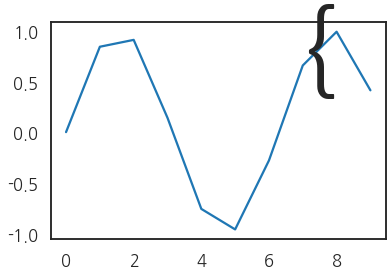

In [47]:
im = plt.imread("test.png")
X = np.arange(0, 10)
Y = np.sin(X)


from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots()
ax.plot(X, Y)
# obj = OffsetImage(im, zoom = 0.2, alpha=1)
# obj_box = AnnotationBbox(obj, (7, 0.5), frameon=False)
# ax.add_artist(obj_box)

ax.text(7, 0.5, "{", fontdict={"fontsize":"100"})

In [38]:
for col in df_sn.columns:
    print(col)

year
num_total
num_M
num_F
cat_go3
cat_grad
cat_ged
num_test
score_avg
score_avg_M
score_avg_F
score_avg_go3
score_avg_grad
score_t50_avg
score_t50_avg_M
score_t50_avg_F
score_t50_avg_go3
score_avg_grad.1
num_test_rate
num_M_rate
num_F_rate
